### Import packages and helper functions

In [1]:
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models

In [2]:
from helper import split_and_transform, evaluate, train, predict

In [3]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

### Load the dataset

In [4]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

eval_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

dataset = datasets.ImageFolder(root="./dataset")

train_data, val_data, test_data = split_and_transform(dataset, train_transform, eval_transform)

### Transfer learning using ResNet18

In [5]:
model = models.resnet18(pretrained=True)
num_classes = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train(model, train_data, val_data, criterion, optimizer, device, early_stopping=True)


d:\Documents\batik-classifier\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Documents\batik-classifier\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/1000, Loss: 0.9257, Validation Accuracy: 77.7778
Epoch 2/1000, Loss: 1.3487, Validation Accuracy: 36.5079
Epoch 3/1000, Loss: 1.3687, Validation Accuracy: 36.5079
Epoch 4/1000, Loss: 1.3673, Validation Accuracy: 20.6349
Epoch 5/1000, Loss: 1.3458, Validation Accuracy: 34.9206
Epoch 6/1000, Loss: 1.1901, Validation Accuracy: 29.3651
Epoch 7/1000, Loss: 1.0292, Validation Accuracy: 56.3492
Epoch 8/1000, Loss: 0.9564, Validation Accuracy: 57.9365
Epoch 9/1000, Loss: 1.0479, Validation Accuracy: 61.9048
Epoch 10/1000, Loss: 0.8589, Validation Accuracy: 75.3968
Epoch 11/1000, Loss: 0.8202, Validation Accuracy: 71.4286
Epoch 12/1000, Loss: 0.7342, Validation Accuracy: 76.1905
Epoch 13/1000, Loss: 0.6438, Validation Accuracy: 71.4286
Epoch 14/1000, Loss: 0.5834, Validation Accuracy: 83.3333
Epoch 15/1000, Loss: 0.5189, Validation Accuracy: 75.3968
Epoch 16/1000, Loss: 0.5436, Validation Accuracy: 75.3968
Epoch 17/1000, Loss: 0.4681, Validation Accuracy: 78.5714
Epoch 18/1000, Loss: 0.

In [6]:
accuracy = evaluate(model, test_data, device)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 89.7638


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


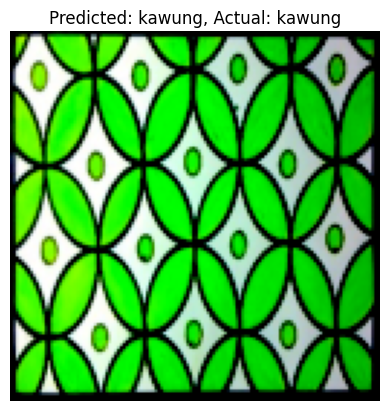

In [7]:
data_iter = iter(test_data)
images, labels = next(data_iter)
random_id = random.randint(0, len(images) - 1)
image = images[random_id].unsqueeze(0).to(device)
label = labels[random_id].item()

predicted = predict(model, image)
predicted_label = dataset.classes[predicted.item()]

plt.imshow(image.squeeze().cpu().permute(1, 2, 0))
plt.title(f"Predicted: {predicted_label}, Actual: {dataset.classes[label]}")
plt.axis("off")
plt.show()